# Ömer Seyfeddin Koç (070160029) - HW3

In [2]:
# Required modules added 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("Daegu_Real_Estate_data.csv")
df

,SalePrice,YearBuilt,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),N_Parkinglot(Basement),TimeToBusStop,...,N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,814,3,terraced,individual_heating,management_in_trust,111,184,5min~10min,...,1,1,0,3,2,2,2,5,6,9
1,51327,1985,587,8,corridor,individual_heating,self_management,80,76,0~5min,...,1,2,1,2,1,1,0,3,12,4
2,48672,1985,587,6,corridor,individual_heating,self_management,80,76,0~5min,...,1,2,1,2,1,1,0,3,12,4
3,380530,2006,2056,8,terraced,individual_heating,management_in_trust,249,536,0~5min,...,1,0,0,2,2,1,2,5,3,7
4,221238,1993,1761,3,mixed,individual_heating,management_in_trust,523,536,0~5min,...,1,5,0,4,3,5,5,4,14,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5886,511504,2007,1643,19,terraced,individual_heating,management_in_trust,0,1270,0~5min,...,1,0,2,3,3,2,2,10,9,10
5887,298230,2006,903,13,terraced,individual_heating,management_in_trust,123,181,5min~10min,...,1,2,0,4,3,3,1,4,8,11
5888,357522,2007,868,20,terraced,individual_heating,management_in_trust,0,1270,0~5min,...,1,0,2,3,3,2,2,10,9,10
5889,312389,1978,1327,1,corridor,individual_heating,self_management,87,0,0~5min,...,1,0,0,3,3,3,2,3,7,11


In [3]:
# Checked which properties are type is "object"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   SalePrice                           5891 non-null   int64 
 1   YearBuilt                           5891 non-null   int64 
 2   Size(sqf)                           5891 non-null   int64 
 3   Floor                               5891 non-null   int64 
 4   HallwayType                         5891 non-null   object
 5   HeatingType                         5891 non-null   object
 6   AptManageType                       5891 non-null   object
 7   N_Parkinglot(Ground)                5891 non-null   int64 
 8   N_Parkinglot(Basement)              5891 non-null   int64 
 9   TimeToBusStop                       5891 non-null   object
 10  TimeToSubway                        5891 non-null   object
 11  N_APT                               5891 non-null   int6

## 1) Conduct necessary preprocessing of data

In [4]:
# Converting categorical variables to numerical values with get_dummies
df = pd.get_dummies(df, columns=["HallwayType","HeatingType","AptManageType","TimeToBusStop","TimeToSubway"])

In [5]:
# Checked the changes and look
df

,SalePrice,YearBuilt,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),N_APT,N_manager,N_elevators,N_FacilitiesNearBy(PublicOffice),...,AptManageType_management_in_trust,AptManageType_self_management,TimeToBusStop_0~5min,TimeToBusStop_10min~15min,TimeToBusStop_5min~10min,TimeToSubway_0-5min,TimeToSubway_10min~15min,TimeToSubway_15min~20min,TimeToSubway_5min~10min,TimeToSubway_no_bus_stop_nearby
0,141592,2006,814,3,111,184,3,3,0,2,...,1,0,0,0,1,0,1,0,0,0
1,51327,1985,587,8,80,76,1,2,2,5,...,0,1,1,0,0,0,0,0,1,0
2,48672,1985,587,6,80,76,1,2,2,5,...,0,1,1,0,0,0,0,0,1,0
3,380530,2006,2056,8,249,536,6,5,11,1,...,1,0,1,0,0,1,0,0,0,0
4,221238,1993,1761,3,523,536,8,8,20,6,...,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5886,511504,2007,1643,19,0,1270,7,14,16,3,...,1,0,1,0,0,1,0,0,0,0
5887,298230,2006,903,13,123,181,3,3,11,3,...,1,0,0,0,1,1,0,0,0,0
5888,357522,2007,868,20,0,1270,7,14,16,3,...,1,0,1,0,0,1,0,0,0,0
5889,312389,1978,1327,1,87,0,2,1,4,3,...,0,1,1,0,0,1,0,0,0,0


In [6]:
# Scaled the data with MinMaxScaler.
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Print and check scaled df table (df_scaled)
df_scaled = pd.DataFrame(scaled_data, columns = df.columns)
df_scaled

,SalePrice,YearBuilt,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),N_APT,N_manager,N_elevators,N_FacilitiesNearBy(PublicOffice),...,AptManageType_management_in_trust,AptManageType_self_management,TimeToBusStop_0~5min,TimeToBusStop_10min~15min,TimeToBusStop_5min~10min,TimeToSubway_0-5min,TimeToSubway_10min~15min,TimeToSubway_15min~20min,TimeToSubway_5min~10min,TimeToSubway_no_bus_stop_nearby
0,0.196799,0.756757,0.308356,0.047619,0.155680,0.139288,0.166667,0.153846,0.000000,0.285714,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.033600,0.189189,0.205268,0.166667,0.112202,0.057532,0.000000,0.076923,0.074074,0.714286,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.028800,0.189189,0.205268,0.119048,0.112202,0.057532,0.000000,0.076923,0.074074,0.714286,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.628799,0.756757,0.872389,0.166667,0.349229,0.405753,0.416667,0.307692,0.407407,0.142857,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.340799,0.405405,0.738420,0.047619,0.733520,0.405753,0.583333,0.538462,0.740741,0.857143,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5886,0.865600,0.783784,0.684832,0.428571,0.000000,0.961393,0.500000,1.000000,0.592593,0.428571,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5887,0.480001,0.756757,0.348774,0.285714,0.172511,0.137017,0.166667,0.153846,0.407407,0.428571,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
5888,0.587201,0.783784,0.332879,0.452381,0.000000,0.961393,0.500000,1.000000,0.592593,0.428571,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5889,0.505600,0.000000,0.541326,0.000000,0.122020,0.000000,0.083333,0.000000,0.148148,0.428571,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## 2) Try k values from 2 to 30 and select the best k value. 

In [7]:
# List created for k values to be controlled. From 1 to 30.
kList = np.arange(2,31)

# Lists were created for distortion and silhouette scores.
distortionList =[]
silhouetteList = []

# Scores for each k value were checked and added to the list.
for k in kList:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df_scaled)
    distortionList.append(kmeans.inertia_)
    silhouetteList.append(silhouette_score(df_scaled , kmeans.labels_))

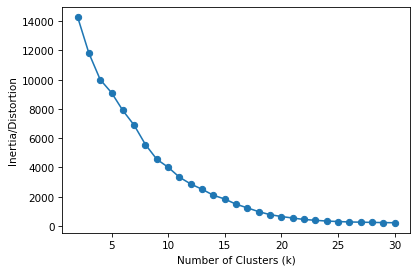

In [8]:
# Inertia / Distortion plot 

plt.figure(dpi=75)
plt.plot(kList , distortionList, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia/Distortion")
plt.show()

**Plot Explanations:**

- The elbow point where the difference between the totals starts to decrease on the graph is determined as the most appropriate K value.
- However, the "elbow" point does not appear clearly in the figure.
- Sometimes elbow method might not always give clear result, so we used silhouette score as well.
- That's why we need to check the Silhouette score. It can be observed much more easily.

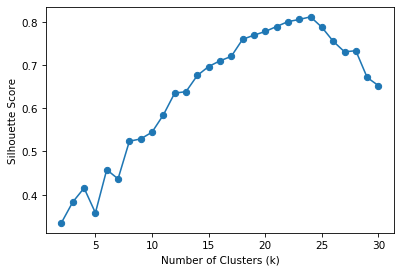

In [9]:
# Silhouette Plot
plt.figure(dpi=75)
plt.plot(kList , silhouetteList, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

In [10]:
# Added the Silhouette Score values to the dataframe for each k value.
s_dp=pd.DataFrame(silhouetteList,index=kList, columns=["Silhouette Score"])
s_dp.index.name = 'k'

In [11]:
# Sorted Silhouette Score values from higher to lower
s_dp.sort_values(by="Silhouette Score", ascending=False)

,Silhouette Score
k,
24,0.811736
23,0.805632
22,0.800568
21,0.789323
25,0.787630
20,0.777873
19,0.769223
18,0.759714
26,0.755209


**Explanations:**

- As seen on the Silhouette score graph and table, it gives the highest score at k = 24. 
- That's why we set our optimal clusters k value to 24.

## 3) Rerun clustering algorithm with best k, print out the cluster centers.

In [12]:
# Implemented KMeans with n_cluster=24, n_init=100, and we used k-means++ as init.
kmeans = KMeans(n_clusters = 24, n_init = 100,init='k-means++')
kmeans.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=24, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

**Explanations:**

- I changed the default value of the n_int parameter from 10 to 100. As a result, KMeans algorithm will get closer to finding the best option by trying 100 different starting points.
- Also, we need to choose our starting points as further away as possible. In sclit learn, there is k-means++ which works before k-means algorithm and for tries to place these randomly selected points as further away as possible local minimum convergence. That's why I used k- means++ as the init value.

In [13]:
# Our cluster centers
kmeans.cluster_centers_
results = pd.DataFrame(kmeans.cluster_centers_ , columns = df.columns)
results

,SalePrice,YearBuilt,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),N_APT,N_manager,N_elevators,N_FacilitiesNearBy(PublicOffice),...,AptManageType_management_in_trust,AptManageType_self_management,TimeToBusStop_0~5min,TimeToBusStop_10min~15min,TimeToBusStop_5min~10min,TimeToSubway_0-5min,TimeToSubway_10min~15min,TimeToSubway_15min~20min,TimeToSubway_5min~10min,TimeToSubway_no_bus_stop_nearby
0,0.427410,7.837838e-01,0.513778,0.333028,7.769986e-01,3.966692e-01,1.666667e-01,3.076923e-01,3.703704e-01,2.857143e-01,...,1.000000e+00,6.938894e-17,1.000000e+00,3.816392e-17,6.383782e-16,1.000000e+00,8.049117e-16,6.383782e-16,5.551115e-16,-1.942890e-16
1,0.242471,7.297297e-01,0.283117,0.266621,9.396914e-02,6.040878e-01,5.833333e-01,3.846154e-01,3.719247e-15,7.142857e-01,...,1.000000e+00,9.159340e-16,1.000000e+00,1.231654e-16,-2.831069e-15,-5.051515e-15,1.165734e-15,7.216450e-16,1.000000e+00,-4.926615e-16
2,0.328215,7.567568e-01,0.319716,0.228500,1.556802e-01,1.392884e-01,1.666667e-01,1.538462e-01,0.000000e+00,2.857143e-01,...,1.000000e+00,-1.179612e-16,-4.440892e-16,-2.602085e-17,1.000000e+00,1.054712e-15,1.000000e+00,5.551115e-16,4.996004e-16,9.714451e-17
3,0.325194,9.459459e-01,0.278437,0.274878,1.122020e-02,7.040121e-01,5.000000e-01,3.846154e-01,5.185185e-01,7.142857e-01,...,1.000000e+00,5.620504e-16,1.000000e+00,8.673617e-17,-1.360023e-15,1.000000e+00,1.026956e-15,6.938894e-16,5.828671e-16,-3.677614e-16
4,0.231627,4.054054e-01,0.395626,0.248092,7.335203e-01,4.057532e-01,5.833333e-01,5.384615e-01,7.407407e-01,8.571429e-01,...,1.000000e+00,8.534840e-16,1.000000e+00,1.162265e-16,-2.581269e-15,-4.607426e-15,1.137979e-15,1.000000e+00,5.828671e-16,-4.718448e-16
5,0.311766,2.162162e-01,0.488595,0.124048,1.000000e+00,1.332268e-15,5.000000e-01,5.384615e-01,1.000000e+00,7.142857e-01,...,1.000000e+00,1.387779e-17,1.000000e+00,3.295975e-17,8.881784e-16,1.054712e-15,1.000000e+00,6.383782e-16,5.551115e-16,-1.734723e-16
6,0.076160,3.783784e-01,0.165953,0.172678,2.805049e-01,1.110223e-15,1.666667e-01,3.076923e-01,3.703704e-01,1.000000e+00,...,1.000000e+00,3.469447e-17,-4.329870e-15,3.469447e-17,1.000000e+00,8.881784e-16,1.000000e+00,6.383782e-16,5.551115e-16,-1.804112e-16
7,0.104667,2.162162e-01,0.221198,0.175519,1.402525e-01,1.362604e-02,-6.106227e-16,3.330669e-16,7.407407e-02,7.142857e-01,...,1.000000e+00,6.245005e-17,1.000000e+00,-6.938894e-18,1.110223e-16,2.220446e-16,-1.665335e-16,2.220446e-16,1.000000e+00,3.469447e-17
8,0.462958,7.567568e-01,0.522080,0.307402,3.492286e-01,4.057532e-01,4.166667e-01,3.076923e-01,4.074074e-01,1.428571e-01,...,1.000000e+00,2.775558e-17,1.000000e+00,3.469447e-17,8.326673e-16,1.000000e+00,7.771561e-16,6.383782e-16,5.551115e-16,-1.734723e-16
9,0.186544,3.783784e-01,0.331605,0.200058,1.991585e-01,5.980318e-02,1.666667e-01,2.307692e-01,2.962963e-01,7.142857e-01,...,9.992007e-16,1.000000e+00,1.776357e-15,-2.255141e-17,1.000000e+00,1.665335e-16,2.498002e-16,1.000000e+00,4.440892e-16,1.040834e-16


## 4) Identify 2 clusters

In [14]:
# Sorted the results table according to the SalePrice column in descending order.
# Assigned it to the order_results table.
order_results=results.sort_values(by="SalePrice", ascending=False)
order_results

,SalePrice,YearBuilt,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),N_APT,N_manager,N_elevators,N_FacilitiesNearBy(PublicOffice),...,AptManageType_management_in_trust,AptManageType_self_management,TimeToBusStop_0~5min,TimeToBusStop_10min~15min,TimeToBusStop_5min~10min,TimeToSubway_0-5min,TimeToSubway_10min~15min,TimeToSubway_15min~20min,TimeToSubway_5min~10min,TimeToSubway_no_bus_stop_nearby
14,0.634939,7.837838e-01,0.623989,0.308817,9.817672e-03,4.579864e-01,8.333333e-02,3.076923e-01,1.851852e-01,5.714286e-01,...,1.000000e+00,2.775558e-17,1.000000e+00,3.469447e-17,8.326673e-16,1.000000e+00,7.771561e-16,6.383782e-16,5.551115e-16,-1.734723e-16
21,0.618367,9.729730e-01,0.380180,0.331473,6.549790e-01,1.536715e-01,3.333333e-01,3.076923e-01,4.444444e-01,-5.551115e-16,...,1.000000e+00,9.714451e-17,1.000000e+00,0.000000e+00,-5.551115e-17,1.000000e+00,-1.387779e-16,1.110223e-16,1.387779e-16,6.938894e-18
17,0.586458,1.000000e+00,0.317639,0.342986,2.454418e-01,1.000000e+00,1.000000e+00,5.384615e-01,8.888889e-01,1.428571e-01,...,1.000000e+00,-2.775558e-17,1.443290e-15,-1.561251e-17,1.000000e+00,-4.996004e-16,-2.220446e-16,3.885781e-16,1.000000e+00,6.938894e-17
11,0.548816,7.837838e-01,0.502727,0.391959,-4.329870e-15,9.613929e-01,5.000000e-01,1.000000e+00,5.925926e-01,4.285714e-01,...,1.000000e+00,7.840950e-16,1.000000e+00,1.092876e-16,-2.303713e-15,1.000000e+00,1.110223e-15,6.938894e-16,5.828671e-16,-4.510281e-16
13,0.506230,9.548662e-01,0.317445,0.306005,1.262272e-01,8.887207e-01,7.500000e-01,4.615385e-01,7.407407e-01,1.000000e+00,...,1.000000e+00,-1.249001e-16,1.000000e+00,-2.602085e-17,1.054712e-15,1.000000e+00,4.718448e-16,5.551115e-16,4.996004e-16,9.020562e-17
23,0.492080,1.000000e+00,0.273070,0.307143,1.430575e-01,3.028009e-01,4.166667e-01,3.076923e-01,3.703704e-01,4.285714e-01,...,1.000000e+00,0.000000e+00,1.000000e+00,-1.734723e-18,-2.775558e-17,-2.220446e-16,5.551115e-17,-5.551115e-17,1.000000e+00,-2.081668e-17
8,0.462958,7.567568e-01,0.522080,0.307402,3.492286e-01,4.057532e-01,4.166667e-01,3.076923e-01,4.074074e-01,1.428571e-01,...,1.000000e+00,2.775558e-17,1.000000e+00,3.469447e-17,8.326673e-16,1.000000e+00,7.771561e-16,6.383782e-16,5.551115e-16,-1.734723e-16
0,0.427410,7.837838e-01,0.513778,0.333028,7.769986e-01,3.966692e-01,1.666667e-01,3.076923e-01,3.703704e-01,2.857143e-01,...,1.000000e+00,6.938894e-17,1.000000e+00,3.816392e-17,6.383782e-16,1.000000e+00,8.049117e-16,6.383782e-16,5.551115e-16,-1.942890e-16
10,0.380758,8.108108e-01,0.355068,0.262610,2.762973e-01,3.595761e-01,4.166667e-01,3.846154e-01,5.185185e-01,4.285714e-01,...,1.000000e+00,-1.526557e-16,-3.330669e-15,1.561251e-17,1.000000e+00,1.000000e+00,6.938894e-16,6.106227e-16,5.273559e-16,-1.110223e-16
20,0.339976,7.567568e-01,0.357462,0.167258,1.725105e-01,1.370174e-01,1.666667e-01,1.538462e-01,4.074074e-01,4.285714e-01,...,1.000000e+00,-9.020562e-17,1.776357e-15,-2.255141e-17,1.000000e+00,1.000000e+00,2.220446e-16,4.996004e-16,4.440892e-16,9.714451e-17


In [37]:
# Highest sales values 
pd.DataFrame(order_results.iloc[0,:]).transpose()

,SalePrice,YearBuilt,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),N_APT,N_manager,N_elevators,N_FacilitiesNearBy(PublicOffice),...,AptManageType_management_in_trust,AptManageType_self_management,TimeToBusStop_0~5min,TimeToBusStop_10min~15min,TimeToBusStop_5min~10min,TimeToSubway_0-5min,TimeToSubway_10min~15min,TimeToSubway_15min~20min,TimeToSubway_5min~10min,TimeToSubway_no_bus_stop_nearby
14,0.634939,0.783784,0.623989,0.308817,0.009818,0.457986,0.083333,0.307692,0.185185,0.571429,...,1.0,2.775558e-17,1.0,3.469447e-17,8.326673e-16,1.0,7.771561e-16,6.383782e-16,5.551115e-16,-1.734723e-16


In [38]:
# Lowest sales values
pd.DataFrame(order_results.iloc[-1,:]).transpose()

,SalePrice,YearBuilt,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),N_APT,N_manager,N_elevators,N_FacilitiesNearBy(PublicOffice),...,AptManageType_management_in_trust,AptManageType_self_management,TimeToBusStop_0~5min,TimeToBusStop_10min~15min,TimeToBusStop_5min~10min,TimeToSubway_0-5min,TimeToSubway_10min~15min,TimeToSubway_15min~20min,TimeToSubway_5min~10min,TimeToSubway_no_bus_stop_nearby
18,0.04439,0.972973,0.005747,0.327706,0.0,0.165026,-2.220446e-16,0.230769,0.0,0.571429,...,-9.992007e-16,1.0,3.330669e-16,1.0,-5.551115e-17,3.330669e-16,-1.110223e-16,0.0,1.0,-2.081668e-17


## 5) Explain the characteristics defining these clusters by looking at the center values. Which features/columns are definitive and different from rest of the clusters.

In [15]:
order_results.describe()

,SalePrice,YearBuilt,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),N_APT,N_manager,N_elevators,N_FacilitiesNearBy(PublicOffice),...,AptManageType_management_in_trust,AptManageType_self_management,TimeToBusStop_0~5min,TimeToBusStop_10min~15min,TimeToBusStop_5min~10min,TimeToSubway_0-5min,TimeToSubway_10min~15min,TimeToSubway_15min~20min,TimeToSubway_5min~10min,TimeToSubway_no_bus_stop_nearby
count,24.000000,2.400000e+01,24.000000,24.000000,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,24.000000,2.400000e+01,...,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01,2.400000e+01
mean,0.322580,6.720716e-01,0.329008,0.247071,2.403576e-01,3.121057e-01,2.916667e-01,3.012821e-01,0.353395,5.416667e-01,...,8.333333e-01,1.666667e-01,6.666667e-01,4.166667e-02,2.916667e-01,4.166667e-01,1.250000e-01,1.250000e-01,2.916667e-01,4.166667e-02
std,0.182744,3.033184e-01,0.142828,0.076808,2.736574e-01,3.150128e-01,2.747419e-01,2.198260e-01,0.289779,2.793679e-01,...,3.806935e-01,3.806935e-01,4.815434e-01,2.041241e-01,4.643056e-01,5.036102e-01,3.378320e-01,3.378320e-01,4.643056e-01,2.041241e-01
min,0.044390,1.110223e-16,0.005747,0.124048,-4.329870e-15,3.885781e-16,-8.881784e-16,1.665335e-16,0.000000,-5.551115e-16,...,-1.110223e-15,-1.526557e-16,-4.329870e-15,-2.602085e-17,-2.831069e-15,-5.051515e-15,-2.220446e-16,-5.551115e-17,1.387779e-16,-4.926615e-16
25%,0.169643,3.986486e-01,0.263690,0.180060,7.924264e-02,5.923543e-02,6.250000e-02,1.538462e-01,0.129630,3.928571e-01,...,1.000000e+00,-2.949030e-17,1.693090e-15,-9.107298e-18,-5.551115e-17,2.081668e-16,-1.387779e-16,2.081668e-16,4.996004e-16,-1.752071e-16
50%,0.325703,7.702703e-01,0.325661,0.255351,1.416550e-01,1.593490e-01,1.666667e-01,3.076923e-01,0.370370,5.000000e-01,...,1.000000e+00,4.857226e-17,1.000000e+00,0.000000e+00,7.355228e-16,1.054712e-15,5.412337e-16,6.106227e-16,5.551115e-16,-6.938894e-18
75%,0.470239,9.481760e-01,0.386258,0.307756,2.773492e-01,4.188115e-01,5.000000e-01,3.846154e-01,0.518519,7.142857e-01,...,1.000000e+00,8.014422e-16,1.000000e+00,3.556183e-17,1.000000e+00,1.000000e+00,1.047773e-15,6.522560e-16,1.000000e+00,7.112366e-17
max,0.634939,1.000000e+00,0.623989,0.391959,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


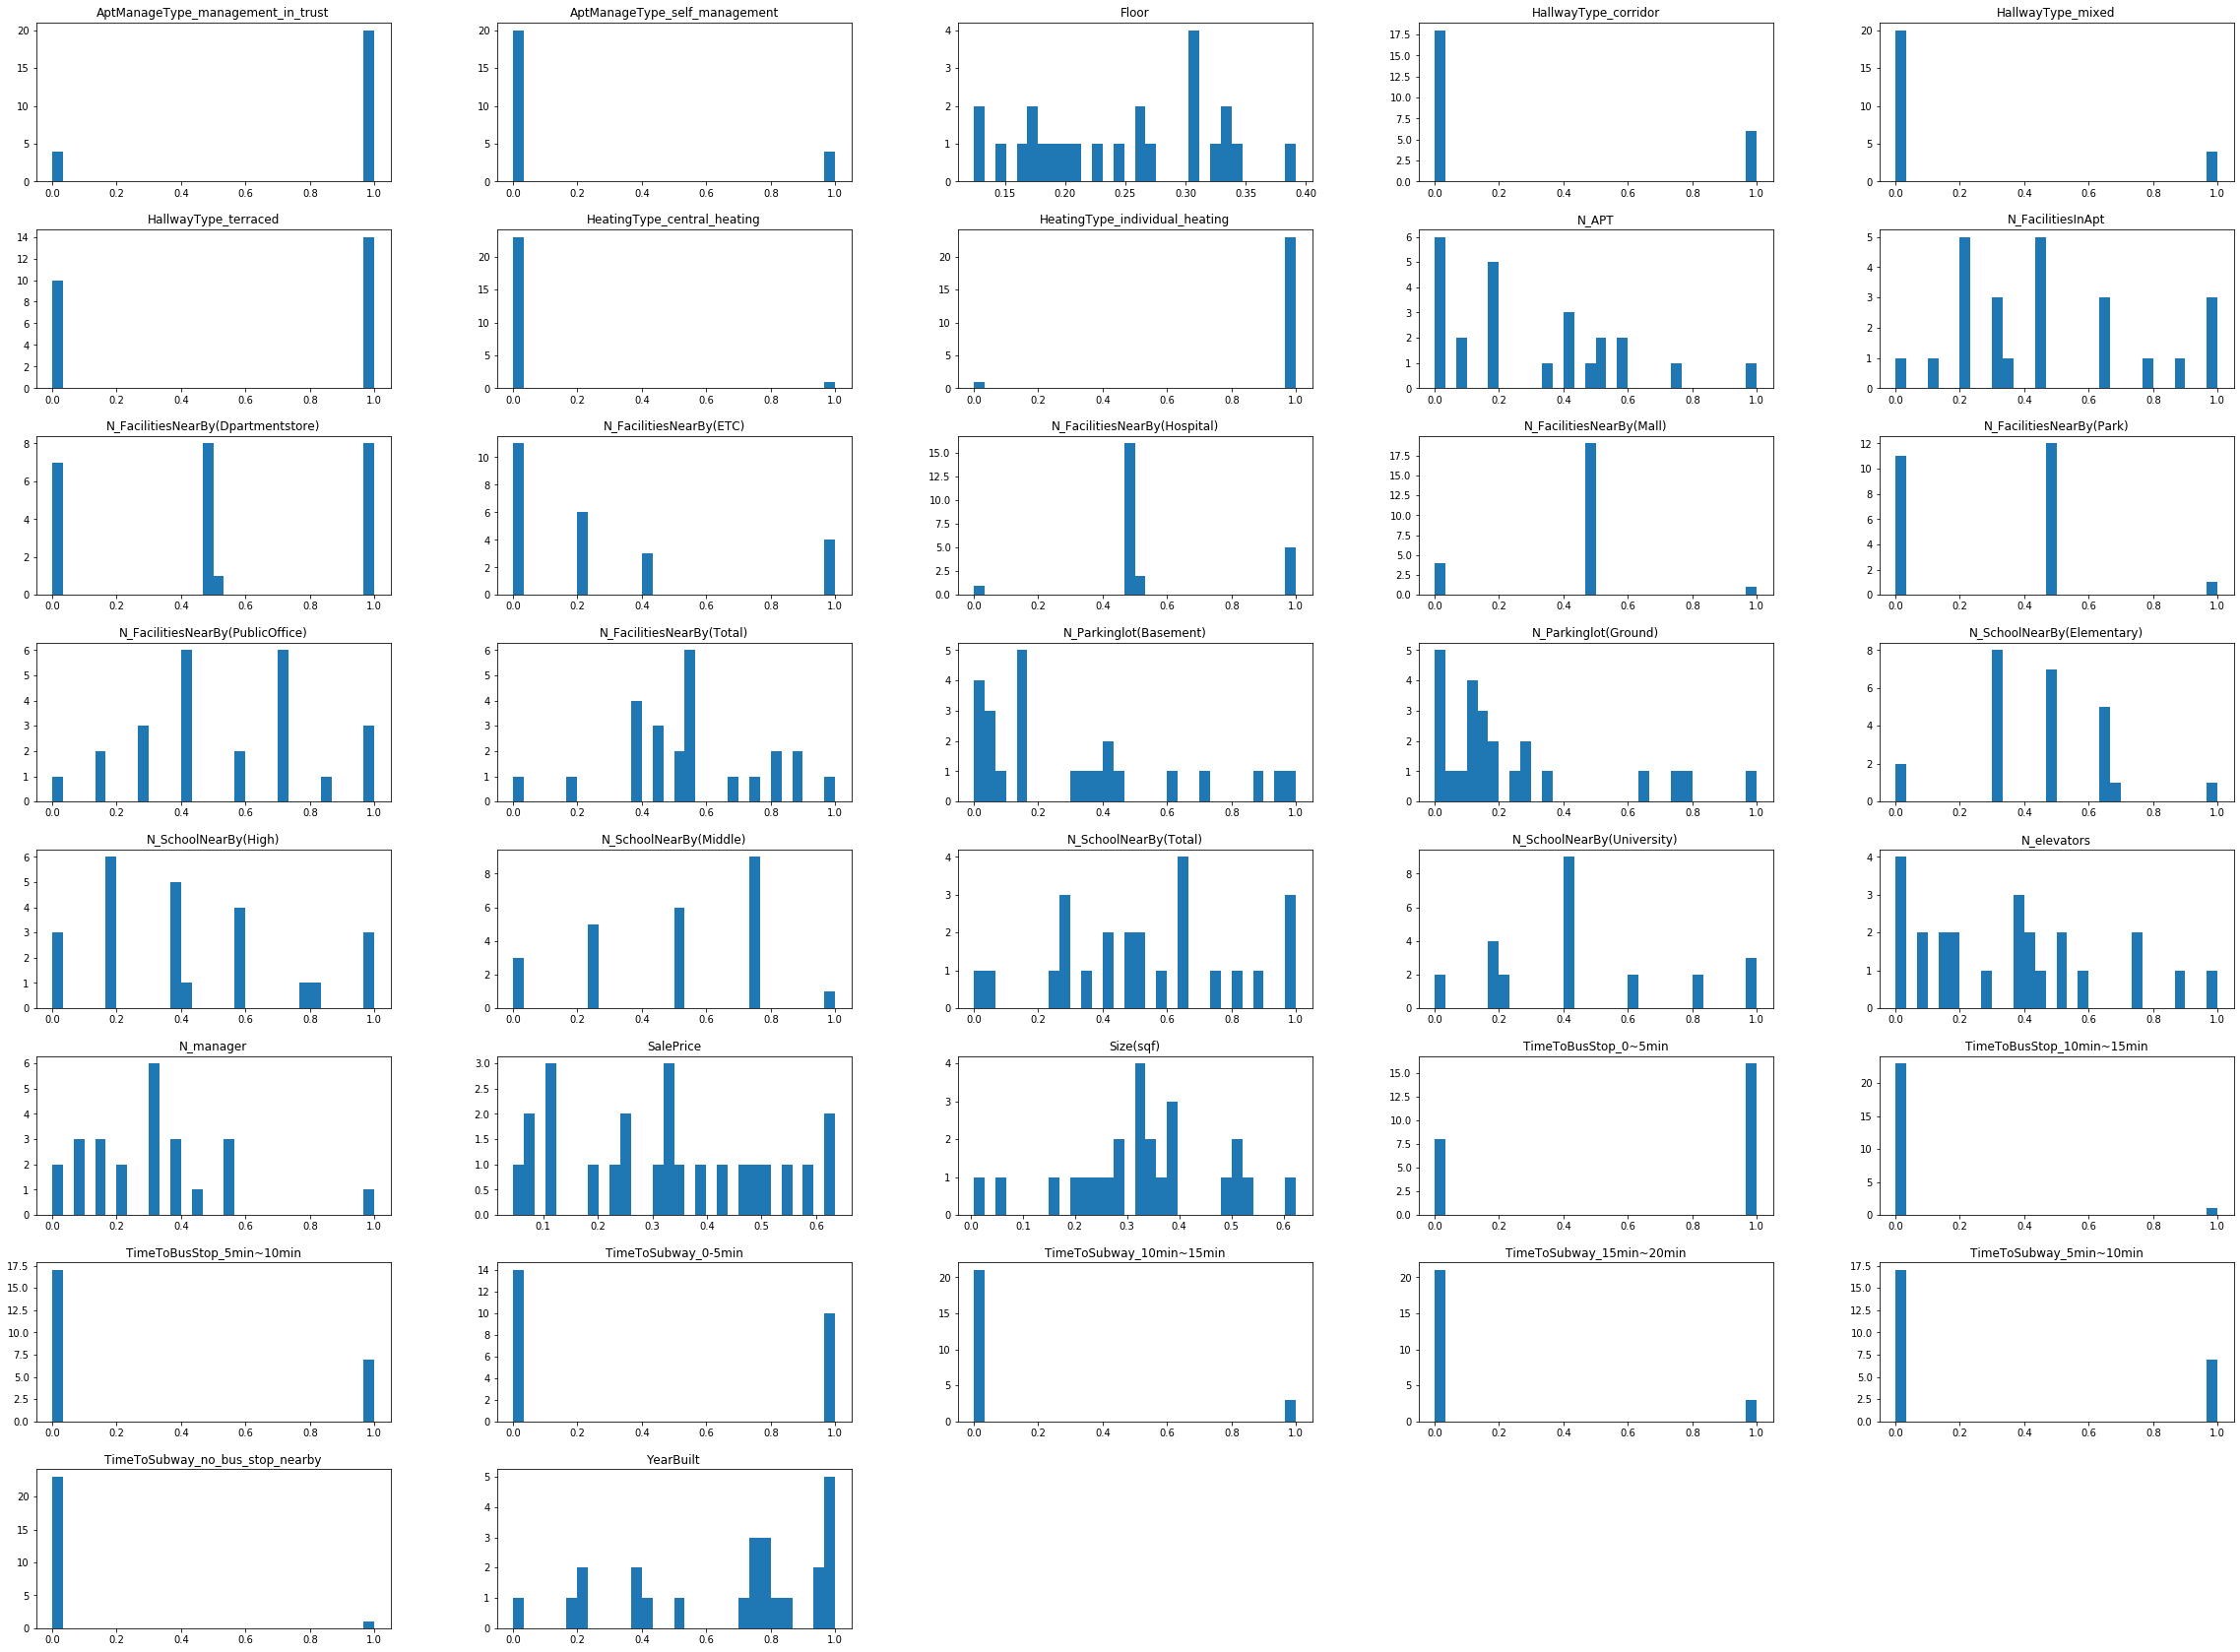

In [31]:
# Histogram distribution was checked for each attributes.
order_results.hist(figsize=(40,30), layout=(8,5),grid=False,  bins = 30)
plt.show()

**Explanations:**

- By using histograms and attributes values in the describe () table, a comparison is made for all attribute values of both clusters in the next step.
- The descriptive attribute values are characteristic of that cluster.
- Examined separately in two clusters for each attribute value.

In [32]:
# Highest sales values 
pd.DataFrame(order_results.iloc[0,:])

,14
SalePrice,6.349385e-01
YearBuilt,7.837838e-01
Size(sqf),6.239887e-01
Floor,3.088166e-01
N_Parkinglot(Ground),9.817672e-03
N_Parkinglot(Basement),4.579864e-01
N_APT,8.333333e-02
N_manager,3.076923e-01
N_elevators,1.851852e-01
N_FacilitiesNearBy(PublicOffice),5.714286e-01


**COMMENT:**
- 0.634 is the peak value on SalePrice. There are 2 clusters around it, we can accept descriptive attributes when we think generally.

- There is intensity around 0.8 in the YearBuilt value. So it is not descriptive.

- The size (sqf) attribute is max and is DESCRIPTIVE. It is different from other clusters.

- The floor value is concentrated around 0.3 so it is not descriptive.

- There are many clusters around N_Parkinglot (Ground) value 0. So it is not descriptive.

- There are other clusters around 0.4 for N_Parkinglot (Basement). is not descriptive.

- There are many values close to the N_APT value. It is not descriptive.

- N_manager is not descriptive.

- The value of n_elavator is not descriptive.

- The N_FacilitiesNearBy (PublicOffice) value is not distinctive around 0.5.

- N_FacilitiesNearBy (Hospital) value is not discriminatory around 0.5.

- The N_FacilitiesNearBy (Dpartmentstore) value is dense around 0, 0.5, and 1. So it is not distinctive.

- The N_FacilitiesNearBy (Mall) value is not distinctive around 0.5.

- The N_FacilitiesNearBy (ETC) value is not distinguished.

- The N_FacilitiesNearBy (Park) value is concentrated around 0, and 0.5. So it is not distinctive.

- There is density around 0.3 for the N_SchoolNearBy (Elementary) property. It is not distinctive.

- There is a near-equal distribution for the value of N_SchoolNearBy (Middle). So it is not distinctive.

- N_SchoolNearBy (High) is not an identifier.

- N_SchoolNearBy (University) is not descriptive around a value of 0.2.

- The N_FacilitiesInApt value is concentrated to around 0.4. It is not descriptive.

- The N_FacilitiesNearBy (Total) value is intense for around 0.5. It is not descriptive.

- N_SchoolNearBy (Total) is not descriptive around 0.3.

- There is density around 0 for the HallwayType_corridor value. So it is not distinctive.

- There is density around 0 for the HallwayType_mixed value. So it is not distinctive.

- There is density around 0 and 1 for the HallwayType_terraced value. So it is not distinctive.

- HeatingType_central_heating value is 0 for almost all clusters. So it is not distinctive.

- HeatingType_individual_heating value is 1 for almost all clusters. So it is not distinctive.

- The AptManageType_management_in_trust value is dense around 1. So it is not distinctive.

- The AptManageType_self_management value is concentrated around 0. So it is not distinctive.

- For TimeToBusStop_0 ~ 5min, there is density around 0 and 1. So it is not distinctive.

- There is density around 0 for TimeToBusStop_10min ~ 15min. It is not distinctive.

- For TimeToBusStop_5min ~ 10min, there is density around 0 and 1. So it is not distinctive.

- For the TimeToSubway_0-5min value, there is a density around 0 and 1. So it is not distinctive.

- The TimeToSubway_10min ~ 15min value is almost close to 0 for most clusters. It is not a distinctive feature.

- The TimeToSubway_15min ~ 20min value is almost close to 0 for most clusters. It is not a distinctive feature.

- The TimeToSubway_5min ~ 10min value is almost close to 0 for most clusters. It is not a distinctive feature.

- The TimeToSubway_no_bus_stop_nearby value is close to 0 for almost all clusters. It is not a distinctive feature.



In [36]:
# Lowest sales values
pd.DataFrame(order_results.iloc[-1,:])

,18
SalePrice,4.438975e-02
YearBuilt,9.729730e-01
Size(sqf),5.746842e-03
Floor,3.277056e-01
N_Parkinglot(Ground),0.000000e+00
N_Parkinglot(Basement),1.650265e-01
N_APT,-2.220446e-16
N_manager,2.307692e-01
N_elevators,0.000000e+00
N_FacilitiesNearBy(PublicOffice),5.714286e-01


**COMMENT:**
- The value of 0.043 on the SalePrice is the bottom value. There are 2 clusters around it, we can accept descriptive attributes when we think generally.

- There is intensity around 0.9 at the YearBuilt value. So it is not descriptive.

- The size (sqf) value is in the tail part of the distribution. It is DESCRIPTIVE.

- The floor value is concentrated around 0.3 so it is not descriptive.

- N_Parkinglot (Ground) has many clusters around 0. So it is not descriptive.

- There are more than 5 clusters around 0.15 for N_Parkinglot (Basement). It is not descriptive.

- N_APT value has many values around 0. It is not descriptive.

- There are 5 clusters around 0.2 for the n_manager. In general, it is likely to be descriptive.

- The value of n_elavator is not descriptive.

- N_FacilitiesNearBy (PublicOffice) is not distinctive for a value around 0.5.

- N_FacilitiesNearBy (Hospital) value is not discriminatory around 0.5.

- The N_FacilitiesNearBy (Dpartmentstore) value is dense around 0, 0.5, and 1. So it is not distinctive.

- The N_FacilitiesNearBy (Mall) value is distributed around 0.5. Here, our value is around 0. So it is distinctive!

- The N_FacilitiesNearBy (ETC) value is not identifier.

- The N_FacilitiesNearBy (Park) value is concentrated around 0, and 0.5. So it is not distinctive.

- There are 2 clusters around 0 for the N_SchoolNearBy (Elementary) property. So it is distinctive!

- There is a near-equal distribution for the value of N_SchoolNearBy (Middle). So it is not distinctive.

- N_SchoolNearBy (High) is not an identifier.

- N_SchoolNearBy (University) is not descriptive around 0.2.

- The N_FacilitiesInApt value is near the 0 environment, there is no cluster near it. It is descriptive!

- The N_FacilitiesNearBy (Total) value is dense around 0.37. It is not descriptive.

- N_SchoolNearBy (Total) There is no density around 0. It is descriptive!

- The HallwayType_corridor value is usually dense around 0. Here, our value is 1. It might be distinctive !.

- There is density around 0 for the HallwayType_mixed value. So it is not distinctive.

- HeatingType_central_heating value is 0 for almost all clusters. So it is not distinctive.

- HeatingType_individual_heating value is 1 for almost all clusters. So it is not distinctive.

- The AptManageType_management_in_trust value is usually dense around 1. Here, our value is 0. It might be distinctive !.

- The AptManageType_self_management value is usually dense around 0. Here, our value is 1. It might be distinctive !.

- For TimeToBusStop_0 ~ 5min, there is density around 0 and 1. So it is not distinctive.

- TimeToBusStop_10min ~ 15min is concentrated around 0. Here, our value is 1. So it is distinctive!

- For TimeToBusStop_5min ~ 10min, there is density around 0 and 1. So it is not distinctive.

- For the TimeToSubway_0-5min value, there is a density around 0 and 1. So it is not distinctive.

- The TimeToSubway_10min ~ 15min value is almost close to 0 for most clusters. It is not a distinctive feature.

- The TimeToSubway_15min ~ 20min value is almost close to 0 for most clusters. It is not a distinctive feature.

- TimeToSubway_5min ~ 10min is a distinctive feature since its value is 1.

- The TimeToSubway_no_bus_stop_nearby value is close to 0 for almost all clusters. It is not a distinctive feature.


## Thanks for everything.